## Stout: Case Study #1:
Below is a data set that represents thousands of loans made through the Lending Club platform, which is a platform that allows individuals to lend to other individuals.
We would like you to perform the following using the language of your choice:

1. Describe the dataset and any issues with it.
2. Generate a minimum of 5 unique visualizations using the data and write a brief description of your observations. Additionally, all attempts should be made to make the visualizations visually appealing
3. Create a feature set and create a model which predicts interest_rate using at least 2 algorithms. Describe any data cleansing that must be performed and analysis when examining the data.
4. Visualize the test results and propose enhancements to the model, what would you do if you had more time. Also describe assumptions you made and your approach.

## Dataset
https://www.openintro.org/data/index.php?data=loans_full_schema 

## Output
An HTML website hosting all visualizations and documenting all visualizations and descriptions. All code hosted on GitHub for viewing. Please provide URL’s to both the output and the GitHub repo.

## Step 1: Importing Libraries and datasets:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("loans_full_schema.csv")
data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [3]:
#Checking the quantitative aspects of the data:
data.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [4]:
#Checking the number of rows in the dataset
len(data)

10000

In [5]:
#Checking the rows and columns of the dataset
data.shape

(10000, 55)

## EDA:

In this step I am performing Exploratory Data analysis and I am trying to figure out which columns are potentially expected to be preprocessed in the data cleaning step. I have commented all of my observations too.

In [6]:
#Checking the datatype of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

<AxesSubplot:>

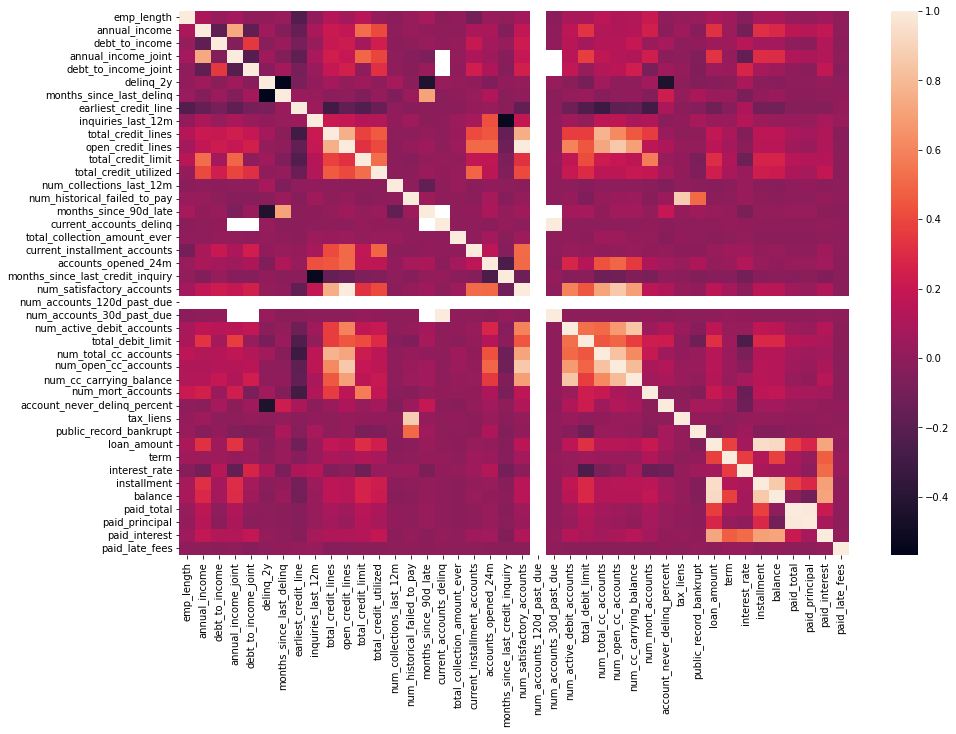

In [7]:
#We are plotting the heatmap to check the correlation between each variable
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr())

In [9]:
#I wanted to check the unique states in the dataset
data['state'].unique()

array(['NJ', 'HI', 'WI', 'PA', 'CA', 'KY', 'MI', 'AZ', 'NV', 'IL', 'FL',
       'SC', 'CO', 'TN', 'TX', 'VA', 'NY', 'GA', 'MO', 'AR', 'MD', 'NC',
       'NE', 'WV', 'NH', 'UT', 'DE', 'MA', 'OR', 'OH', 'OK', 'SD', 'MN',
       'AL', 'WY', 'LA', 'IN', 'KS', 'MS', 'WA', 'ME', 'VT', 'CT', 'NM',
       'AK', 'MT', 'RI', 'ND', 'DC', 'ID'], dtype=object)

In [10]:
#I also checked the number of columns with that state
data['state'].value_counts()

CA    1330
TX     806
NY     793
FL     732
IL     382
NJ     338
OH     338
GA     334
NC     299
PA     298
VA     261
AZ     255
MD     247
MI     245
MA     237
CO     235
WA     235
CT     181
IN     178
TN     167
MN     159
MO     159
NV     158
SC     145
OR     130
WI     128
AL     122
KY      97
LA      96
KS      89
OK      81
MS      72
AR      70
WV      68
UT      61
NE      56
RI      53
NH      47
NM      43
ID      38
HI      35
AK      33
ME      26
DE      24
MT      24
VT      23
SD      20
WY      19
DC      19
ND      14
Name: state, dtype: int64

In [11]:
#There are 50 unique states
len(data['state'].unique())

50

*Preprocessing:* The 'state' column should be converted to dummies to ease the entire analysis during training and testing

In [12]:
#I wanted to check the statistical analysis of annual income
data['annual_income'].describe()

count    1.000000e+04
mean     7.922215e+04
std      6.473429e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.500000e+04
max      2.300000e+06
Name: annual_income, dtype: float64

/Users/hrishitelang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

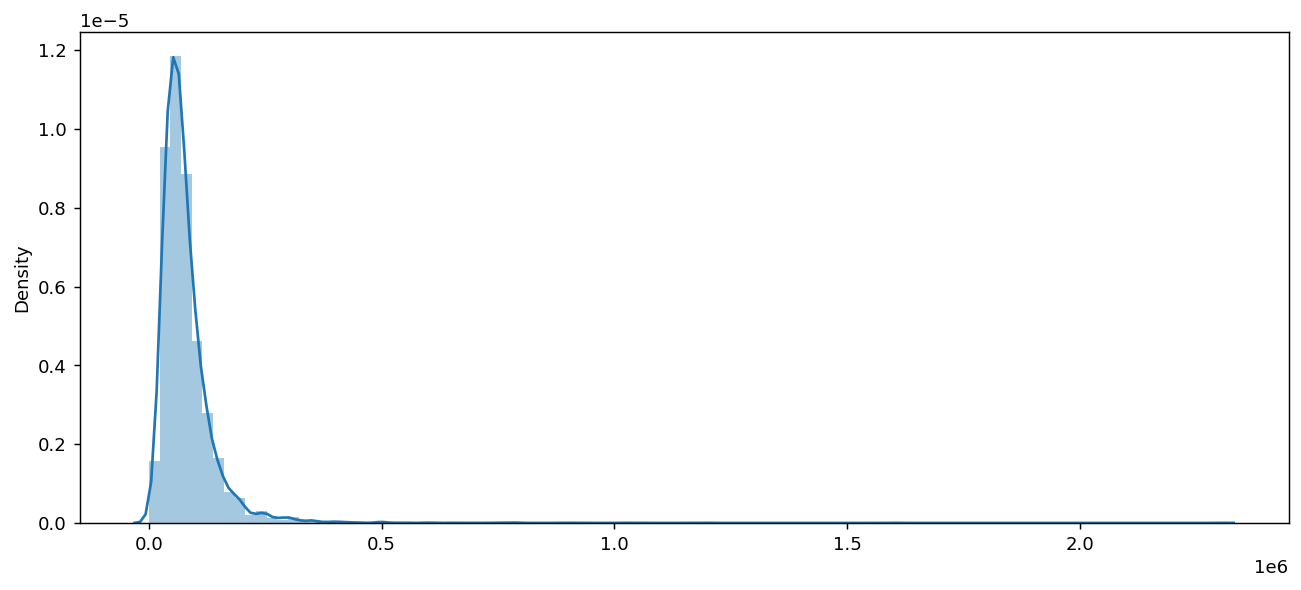

In [13]:
#I perform a distplot to plot the values
plt.figure(figsize=(12,5), dpi=130)
sns.distplot(x=data['annual_income'], bins=100)

In [8]:
#We are checking the value counts of the loan_status column as that interested me
data['loan_status'].value_counts()

Current               9375
Fully Paid             447
In Grace Period         67
Late (31-120 days)      66
Late (16-30 days)       38
Charged Off              7
Name: loan_status, dtype: int64

*Preprocessing:* The annual income looks skewed. We have to remove its outliers.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

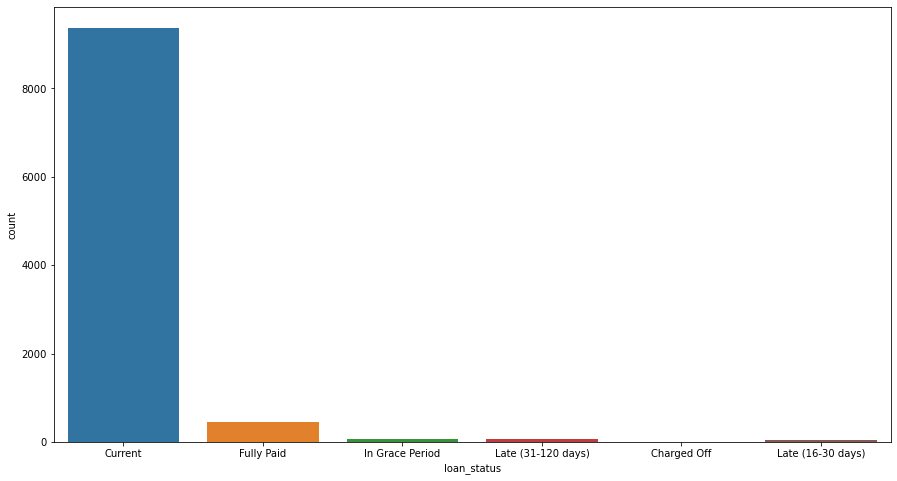

In [15]:
#I also plotted the loan status based on counts
plt.figure(figsize = (15,8))
sns.countplot(x=data['loan_status'], data=data)

There are a lot of customers who still are on loans and comprise the majority of the dataset. A small fraction of them have fully paid and only a handful of them are late or on grace period. I tried to retain only the customers with current and fully paid columns and removed the rest. I also replaced the "Charged Off" Column to default so that I could perform future analyses with this.

In [16]:
data = data[data.loan_status != 'In Grace Period']
data = data[data.loan_status != 'Late (16-30 days)']
data = data[data.loan_status != 'Late (31-120 days)']

In [17]:
#Checking the counts
data['loan_status'] = data['loan_status'].replace({'Charged Off':'Default'})
data['loan_status'].value_counts()

Current       9375
Fully Paid     447
Default          7
Name: loan_status, dtype: int64

I put the hue value as loan_status to plot against the annual income.

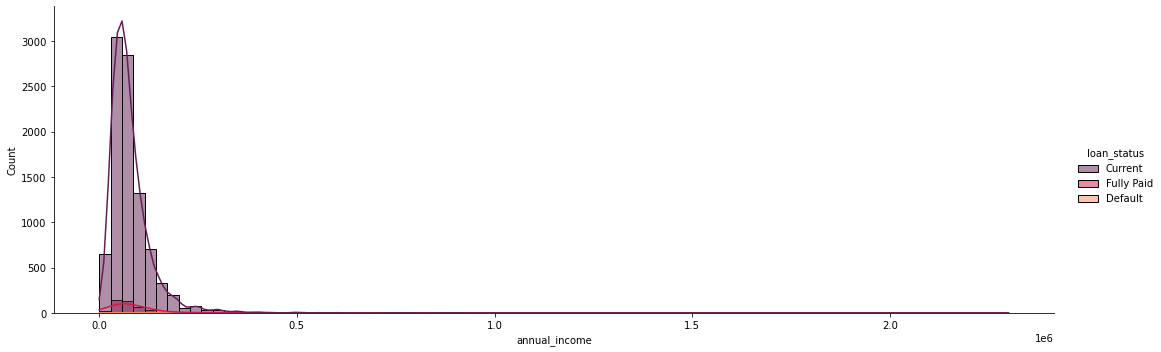

In [18]:
sns.displot(data=data, x='annual_income', hue='loan_status', bins=80, height=5, aspect=3, kde=True, palette='rocket');

The annual income shows only a skewed representation with peaks only around Current loan status

In [19]:
#I wanted to check if there are null values in this column
data['issue_month'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: issue_month, Length: 9829, dtype: bool

In [20]:
#I wanted to see the types of categories in this issue_month
data['issue_month'].head()

0    Mar-2018
1    Feb-2018
2    Feb-2018
3    Jan-2018
4    Mar-2018
Name: issue_month, dtype: object

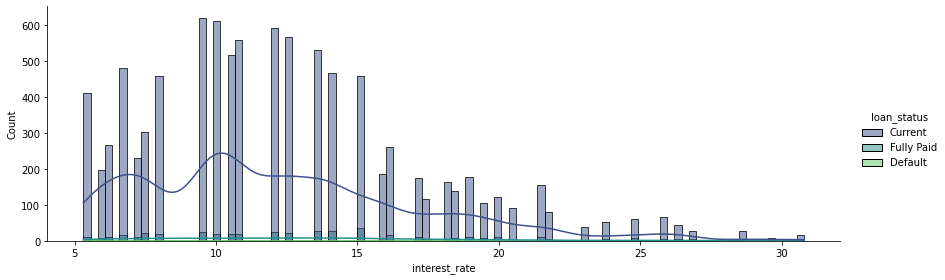

In [21]:
#I checked interest rate against loan_status
sns.displot(data=data, x='interest_rate', hue='loan_status', bins=100, height=4, aspect=3, kde=True, palette='viridis');

We can observe that the interest rate averages between 5 to 15 in the dataset with its peak averaging at 10, but we also have certain anomalous situations such as rates being over 20%.

<AxesSubplot:xlabel='total_debit_limit', ylabel='balance'>

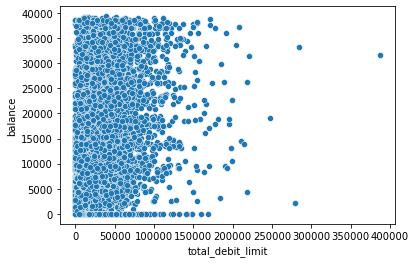

In [22]:
#I wanted to plot using a scatterplot
sns.scatterplot(data=data, x="total_debit_limit", y="balance")

There is no correlation. We discard this representation.

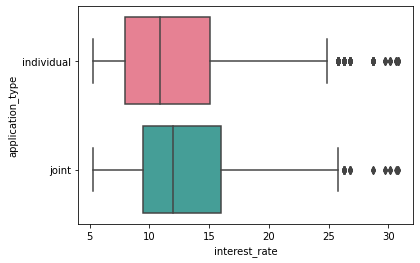

In [23]:
#I performed a boxplot with application type and interest rate.
sns.boxplot(data=data, y='application_type', x='interest_rate', palette='husl');

I can observe that the min-max range for joint has a slightly higher interest rate than individual application type.

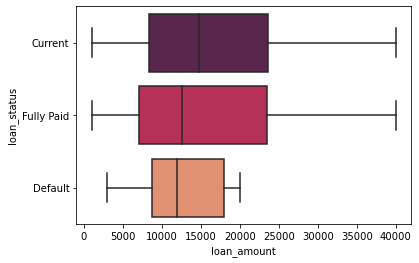

In [24]:
#Doing the same thing for loan_status and loan_amount
sns.boxplot(data=data, y='loan_status', x='loan_amount', palette='rocket');

<AxesSubplot:xlabel='emp_length', ylabel='count'>

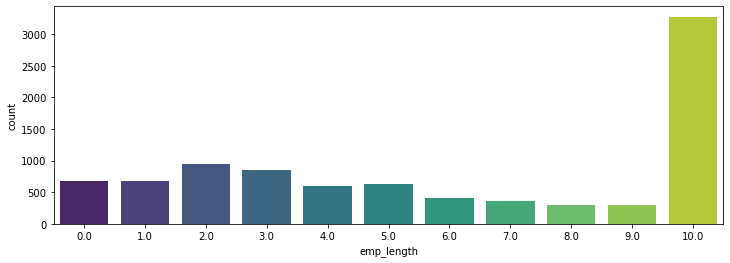

In [25]:
#I am plotting emp_length as countplot. Most of the customers have been working for more than 10+ years
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=data, palette='viridis')

<AxesSubplot:xlabel='emp_length', ylabel='count'>

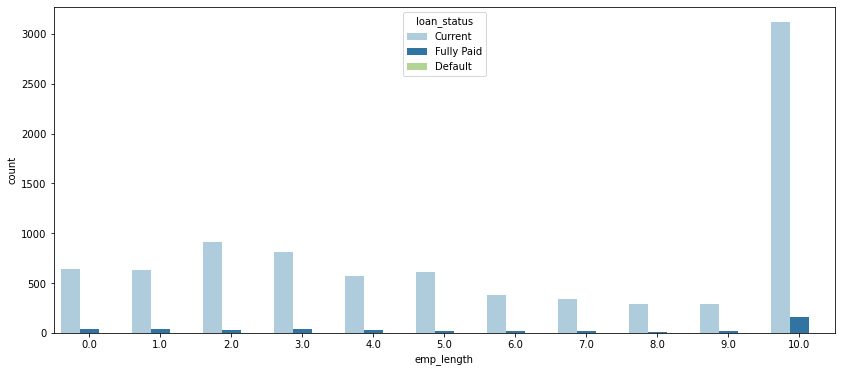

In [26]:
plt.figure(figsize=(14,6))
sns.countplot(x='emp_length',data=data,hue='loan_status', palette='Paired')

People with current status are the ones with more than 10 years of work experience.

<AxesSubplot:xlabel='emp_length', ylabel='count'>

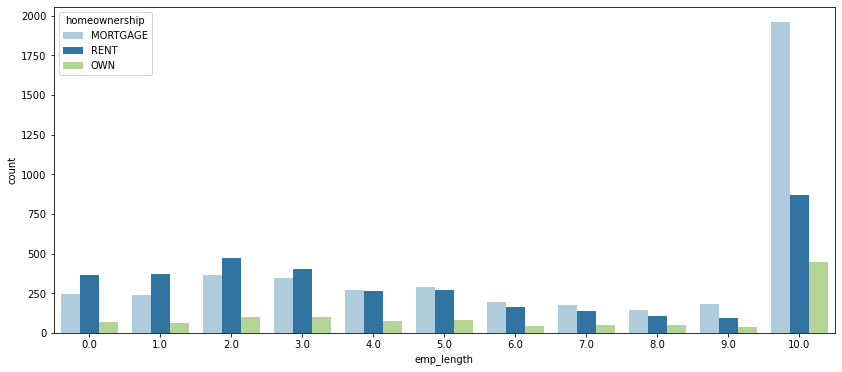

In [27]:
plt.figure(figsize=(14,6))
sns.countplot(x='emp_length',data=data,hue='homeownership', palette='Paired')

We can also see that the mortgage and ownership is higher for customers with more than 10 years of experience. This makes sense as there is more job stability at that point.

In [28]:
#Checking the class of grade
sorted(data['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [29]:
#Cheking the class of sub_grade
sorted(data['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1']

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

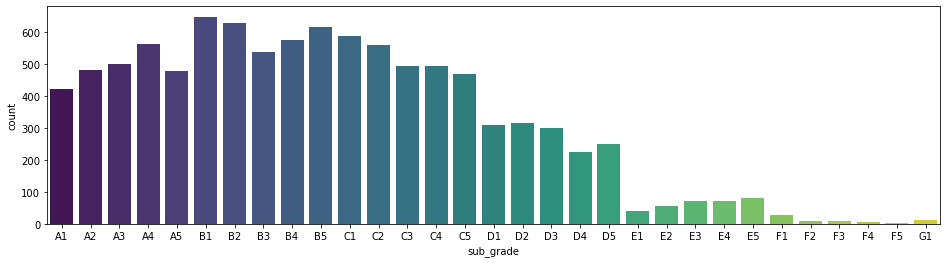

In [30]:
#Plotting the sub grades to see the distribution
plt.figure(figsize=(16,4))
subgrade_order = sorted(data['sub_grade'].unique())
sns.countplot(x='sub_grade',data=data, order=sorted(data['sub_grade'].unique()),palette='viridis')

B1 is the highest!

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

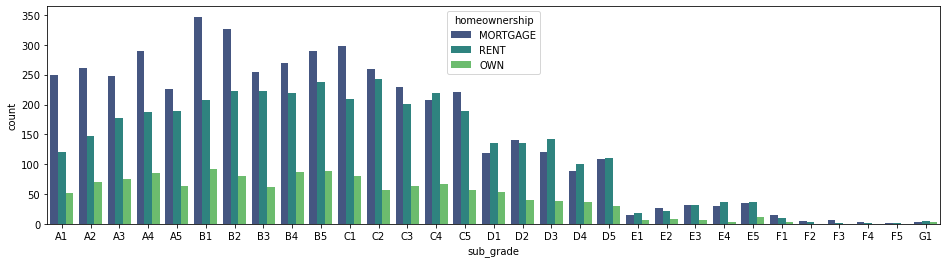

In [31]:
plt.figure(figsize=(16,4))
sns.countplot(x='sub_grade',data=data,order = subgrade_order,palette='viridis' ,hue='homeownership')

<AxesSubplot:xlabel='application_type', ylabel='count'>

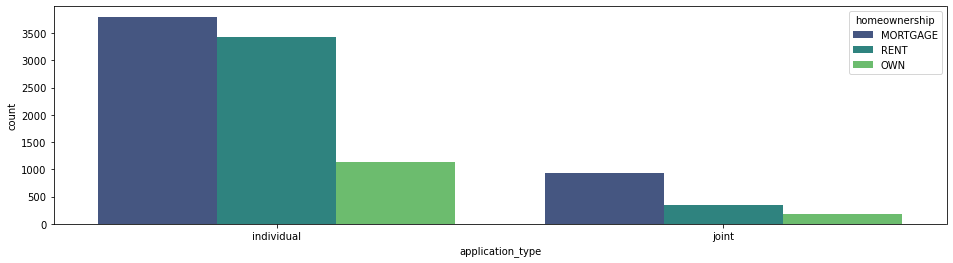

In [32]:
plt.figure(figsize=(16,4))
sns.countplot(x='application_type',data=data,palette='viridis' ,hue='homeownership')

# Data Cleaning:

I am checking the percentage of missing values in the dataset in descending order

In [33]:
((data.isnull().sum()/len(data))*100).sort_values(ascending=False)

verification_income_joint           85.552956
debt_to_income_joint                85.156171
annual_income_joint                 85.156171
months_since_90d_late               77.240818
months_since_last_delinq            56.567301
months_since_last_credit_inquiry    12.788687
emp_title                            8.332486
emp_length                           8.179876
num_accounts_120d_past_due           3.062366
debt_to_income                       0.234001
installment                          0.000000
num_mort_accounts                    0.000000
account_never_delinq_percent         0.000000
tax_liens                            0.000000
public_record_bankrupt               0.000000
loan_purpose                         0.000000
application_type                     0.000000
loan_amount                          0.000000
term                                 0.000000
interest_rate                        0.000000
grade                                0.000000
delinq_2y                         

I plotted the same in a graph.

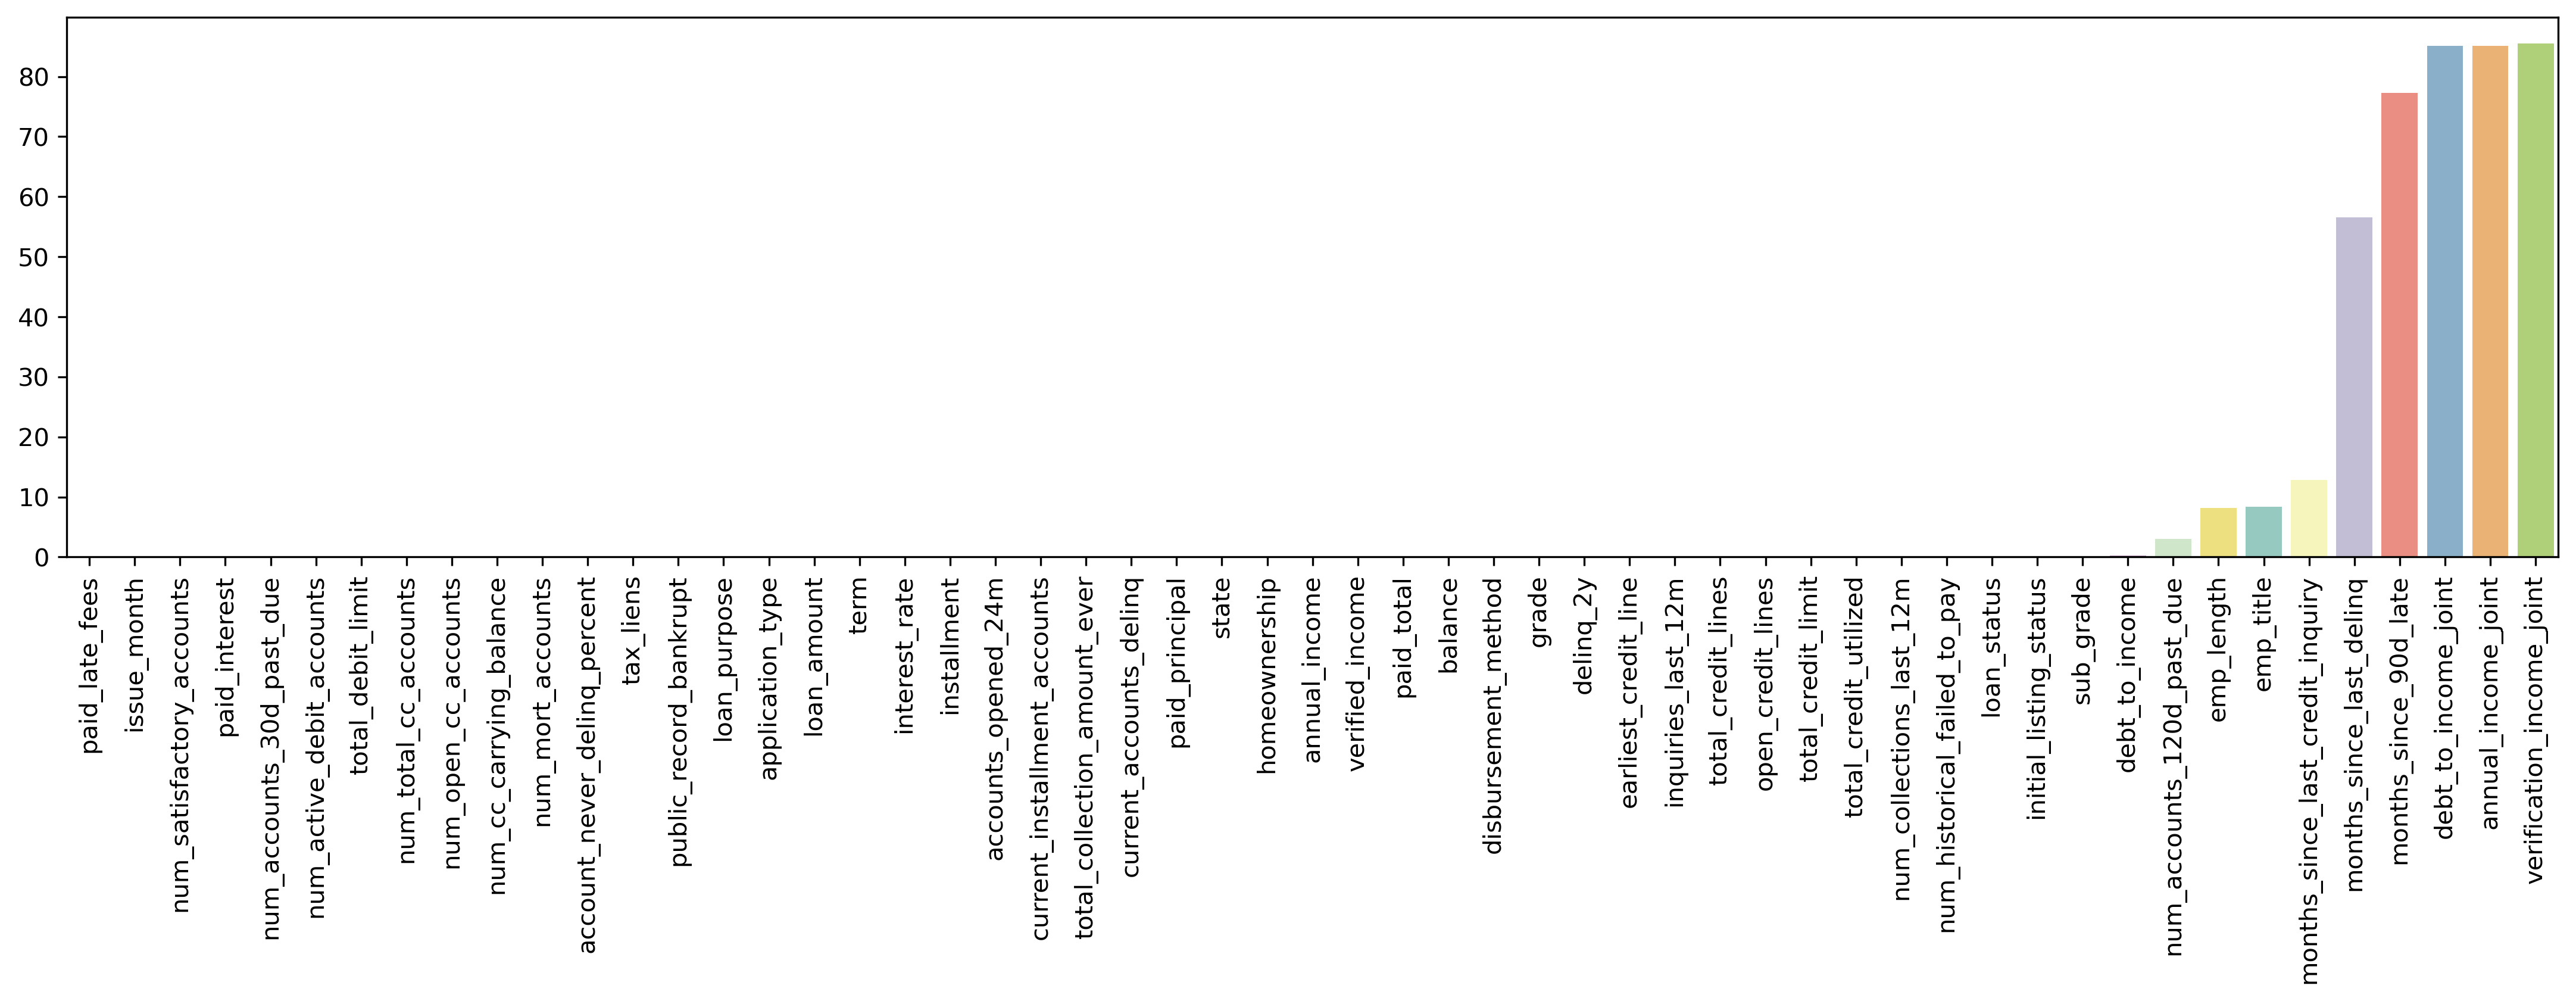

In [34]:
plt.figure(figsize=(18,4),dpi=300)
sns.barplot(y=((data.isnull().sum()/len(data))*100).sort_values(), x=((data.isnull().sum()/len(data))*100).sort_values().index, palette='Set3') 
plt.xticks(rotation=90);

In [35]:
# list of columns that are to be kept. I set 20 as the threshold
keep = data.columns[((data.isnull().sum()/len(data))*100 < 20)].to_list()
keep

['emp_title',
 'emp_length',
 'state',
 'homeownership',
 'annual_income',
 'verified_income',
 'debt_to_income',
 'delinq_2y',
 'earliest_credit_line',
 'inquiries_last_12m',
 'total_credit_lines',
 'open_credit_lines',
 'total_credit_limit',
 'total_credit_utilized',
 'num_collections_last_12m',
 'num_historical_failed_to_pay',
 'current_accounts_delinq',
 'total_collection_amount_ever',
 'current_installment_accounts',
 'accounts_opened_24m',
 'months_since_last_credit_inquiry',
 'num_satisfactory_accounts',
 'num_accounts_120d_past_due',
 'num_accounts_30d_past_due',
 'num_active_debit_accounts',
 'total_debit_limit',
 'num_total_cc_accounts',
 'num_open_cc_accounts',
 'num_cc_carrying_balance',
 'num_mort_accounts',
 'account_never_delinq_percent',
 'tax_liens',
 'public_record_bankrupt',
 'loan_purpose',
 'application_type',
 'loan_amount',
 'term',
 'interest_rate',
 'installment',
 'grade',
 'sub_grade',
 'issue_month',
 'loan_status',
 'initial_listing_status',
 'disbursement_

In [36]:
len(keep)

50

In [37]:
data = data[keep]
data.shape

(9829, 50)

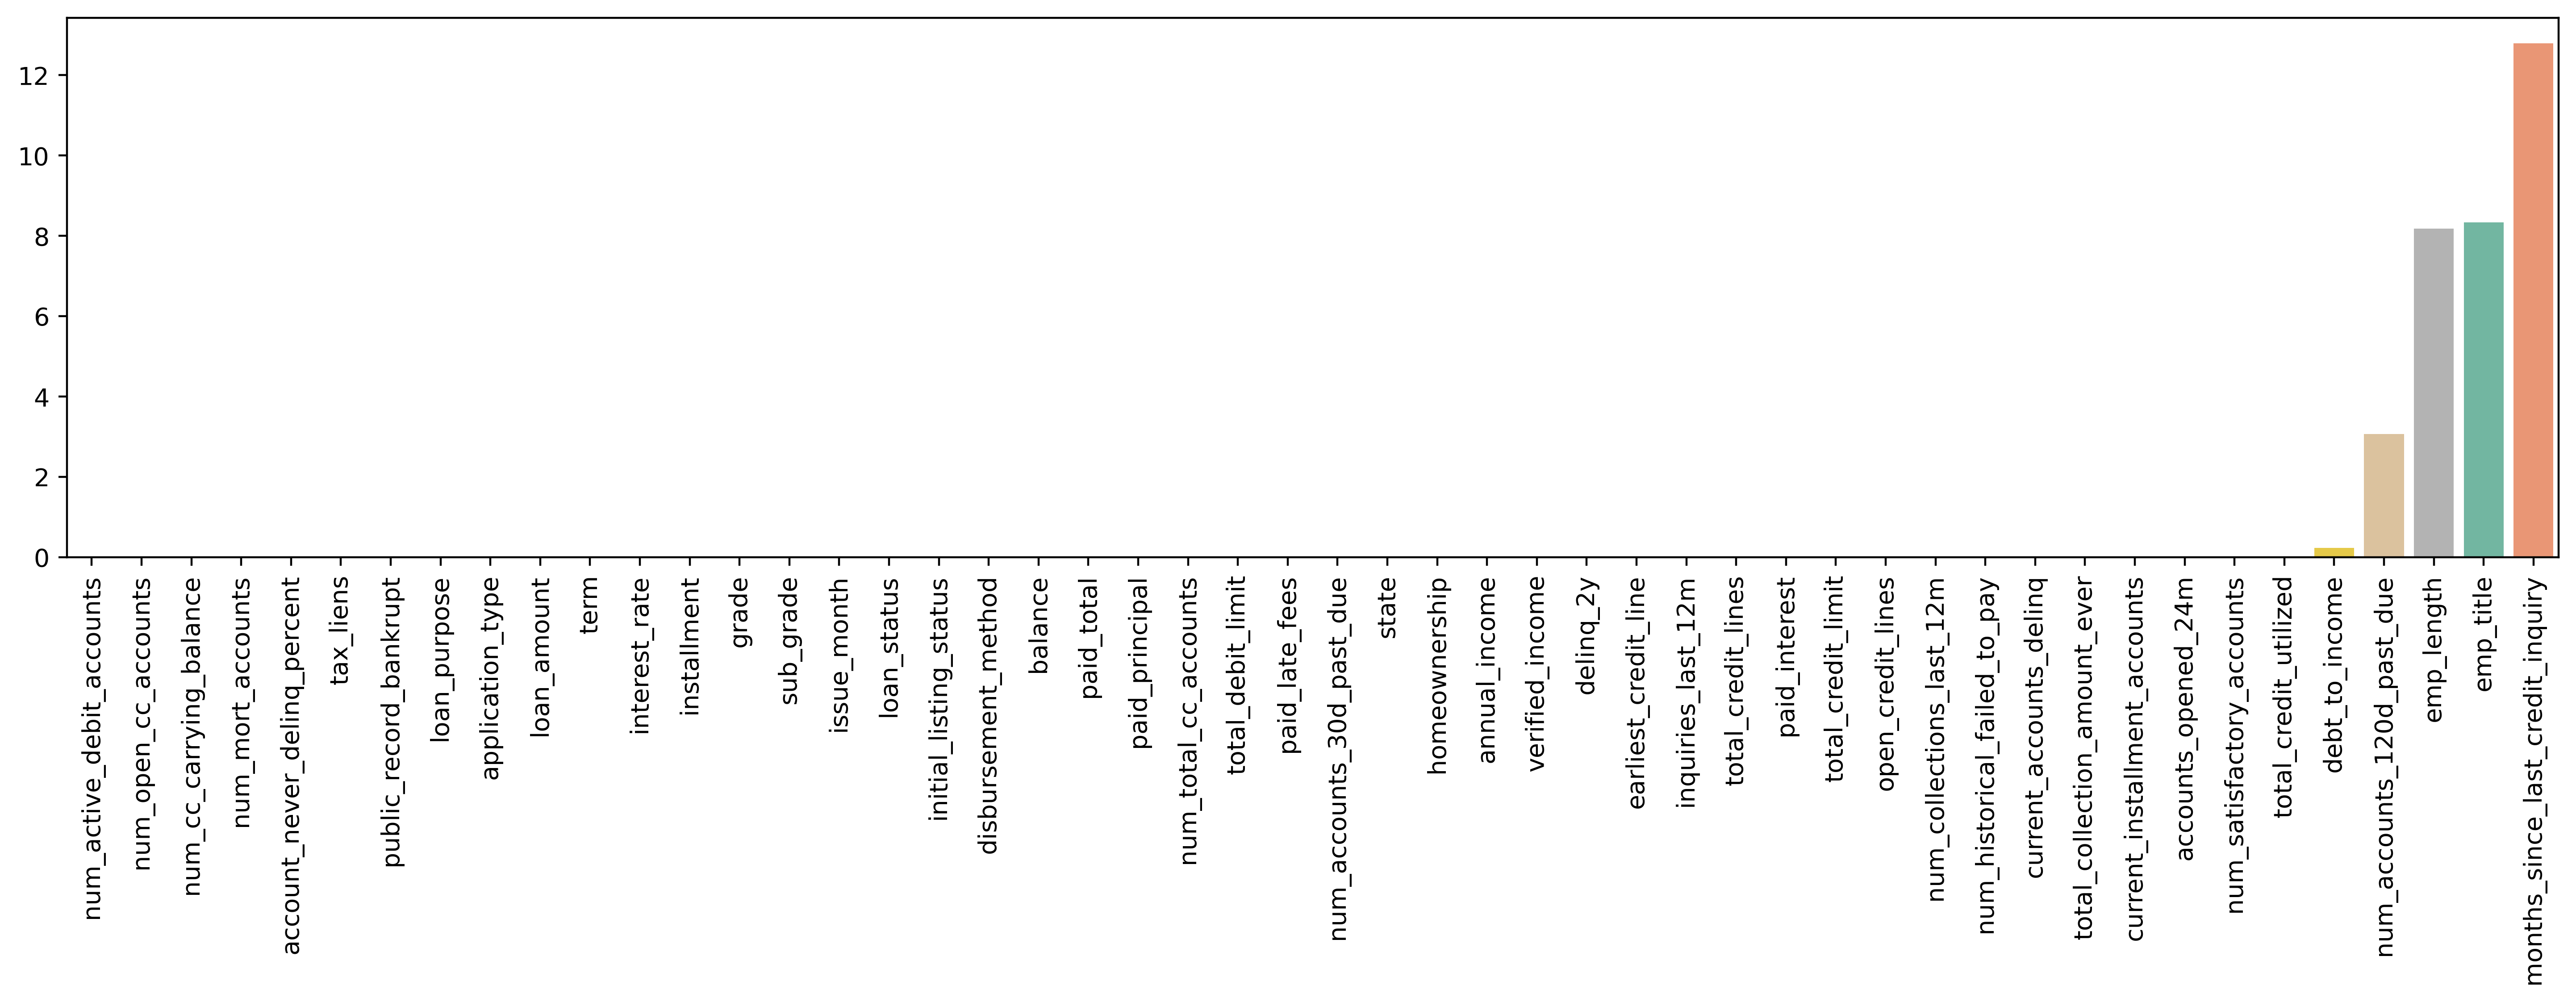

In [38]:
#I checked again
plt.figure(figsize=(18,4),dpi=400)
sns.barplot(y=((data.isnull().sum()/len(data))*100).sort_values(), x=((data.isnull().sum()/len(data))*100).sort_values().index, palette='Set2')
plt.xticks(rotation=90);

In [39]:
data.shape

(9829, 50)

## Preprocessing:

In [40]:
data

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0,2008,5,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,1994,1,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,2004,0,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,1999,1,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [41]:
data.dtypes.value_counts() #I checked how many different datatypes we have

int64      25
float64    13
object     12
dtype: int64

<AxesSubplot:>

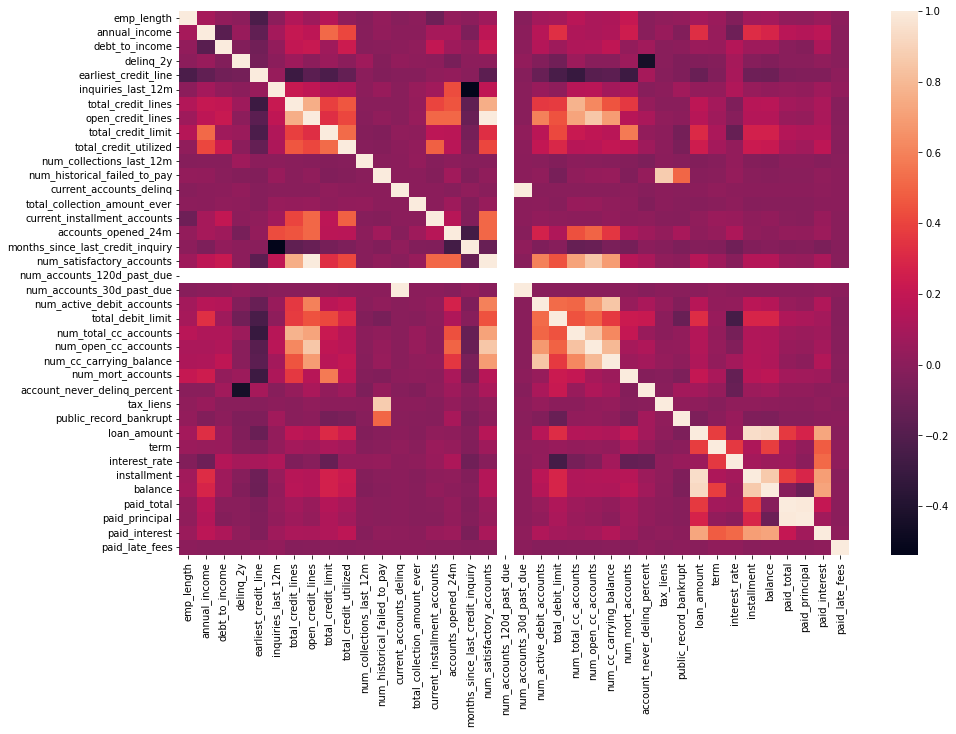

In [42]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr())

In [43]:
data['issue_month']

0       Mar-2018
1       Feb-2018
2       Feb-2018
3       Jan-2018
4       Mar-2018
          ...   
9995    Jan-2018
9996    Feb-2018
9997    Feb-2018
9998    Feb-2018
9999    Feb-2018
Name: issue_month, Length: 9829, dtype: object

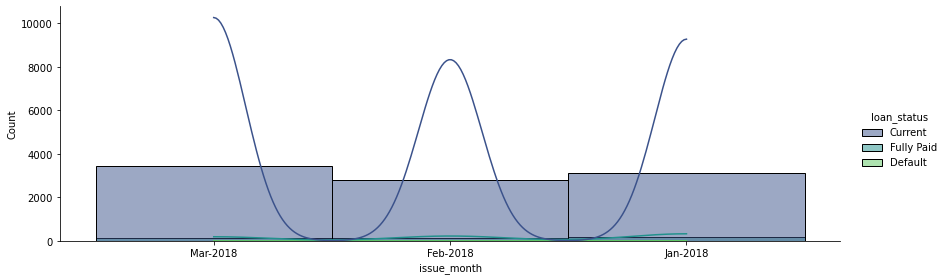

In [44]:
sns.displot(data=data, x='issue_month', hue='loan_status', bins=100, height=4, aspect=3, kde=True, palette='viridis');

In [45]:
#I am describing the emp_title
data['emp_title'].describe()

count        9010
unique       4668
top       manager
freq          216
Name: emp_title, dtype: object

In [46]:
#I dropped the column as the unique values being this intense is not going to help me get the result that I want
data = data.drop('emp_title', axis=1)

In [47]:
#I am creating a dummy variable which works similar to OneHotEncoding()
state_dummies = pd.get_dummies(data['state'], drop_first=True)
state_dummies

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


For convenience and lack of time, I am performing the same thing for the rest of the categorical columns:

In [48]:
#I am adding the state_dummies and dropping the state column
data = pd.concat([data.drop('state', axis=1), state_dummies], axis=1)

In [49]:
data['homeownership'].value_counts()

MORTGAGE    4725
RENT        3784
OWN         1320
Name: homeownership, dtype: int64

In [50]:
homeownership_dummies = pd.get_dummies(data['homeownership'], drop_first=True)

In [51]:
data = pd.concat([data.drop('homeownership', axis=1), homeownership_dummies], axis=1)

In [52]:
#To remove outliers which we saw in EDA, I wanted to remove all the annual income salaries greater than 260000
len(data[data['annual_income'] > 260000])

137

In [53]:
percent_of_rows_of_customers_with_annual_inc_more_than_80000 = 140*100/len(data)
percent_of_rows_of_customers_with_annual_inc_more_than_80000

1.4243564960830197

In [54]:
data = data[data['annual_income'] <= 260000]

In [55]:
len(data)

9692

/Users/hrishitelang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


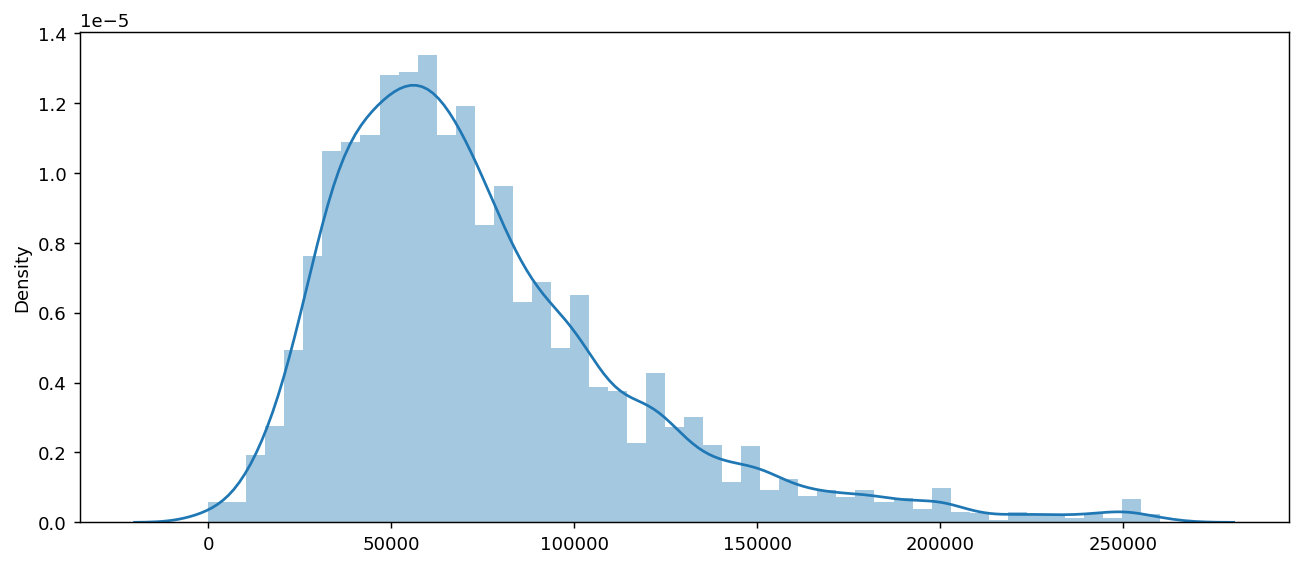

In [56]:
plt.figure(figsize=(12,5), dpi=130)
sns.distplot(x=data['annual_income']);
#The graph looks more normally distributed

In [57]:
data['verified_income'].describe()

count                9692
unique                  3
top       Source Verified
freq                 3961
Name: verified_income, dtype: object

In [58]:
data['verified_income'].value_counts()

Source Verified    3961
Not Verified       3535
Verified           2196
Name: verified_income, dtype: int64

In [59]:
verified_income_dummies = pd.get_dummies(data['verified_income'], drop_first=True)

In [60]:
data = pd.concat([data.drop('verified_income', axis=1), verified_income_dummies], axis=1)

In [61]:
len(data['loan_purpose'].unique())

12

In [62]:
data['loan_purpose'].value_counts()

debt_consolidation    4990
credit_card           2203
other                  889
home_improvement       646
major_purchase         286
medical                153
house                  141
car                    127
small_business         120
moving                  67
vacation                61
renewable_energy         9
Name: loan_purpose, dtype: int64

In [63]:
loan_purpose_dummies = pd.get_dummies(data['loan_purpose'], drop_first=True)

In [64]:
data = pd.concat([data.drop('loan_purpose', axis=1), loan_purpose_dummies], axis=1)

In [65]:
data.shape

(9692, 109)

In [66]:
data['application_type'].value_counts()

individual    8240
joint         1452
Name: application_type, dtype: int64

In [67]:
application_type_dummies = pd.get_dummies(data['application_type'], drop_first=True)
data = pd.concat([data.drop('application_type', axis=1), application_type_dummies], axis=1)

/Users/hrishitelang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


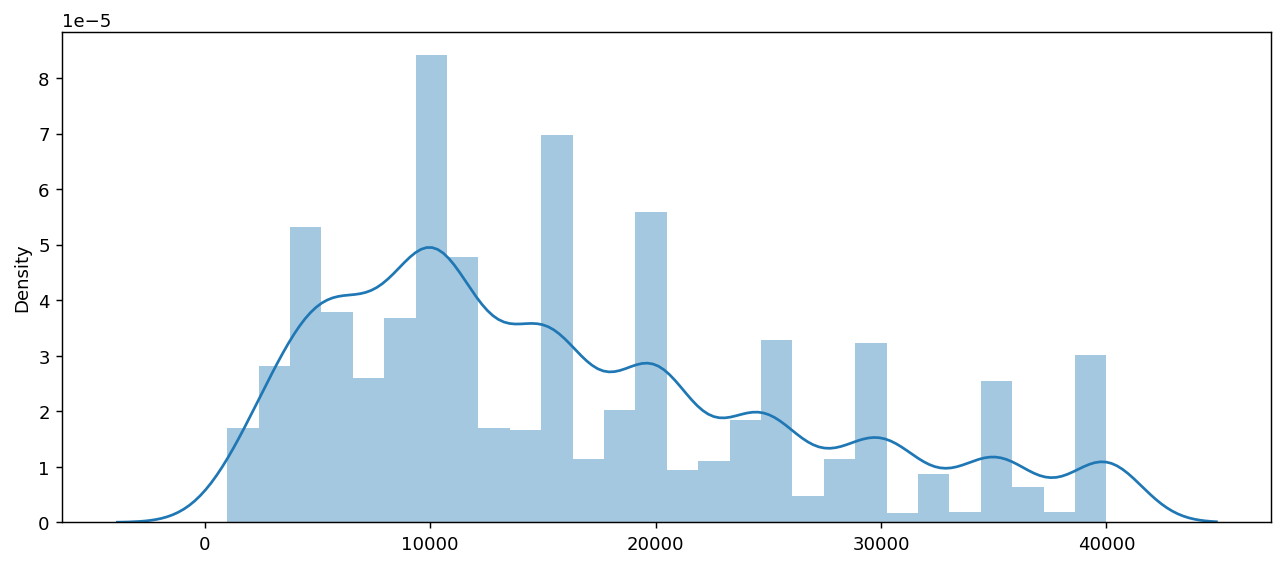

In [68]:
plt.figure(figsize=(12,5), dpi=130)
sns.distplot(x=data['loan_amount']);

In [69]:
data['term'].value_counts()

36    6771
60    2921
Name: term, dtype: int64

<AxesSubplot:xlabel='term', ylabel='count'>

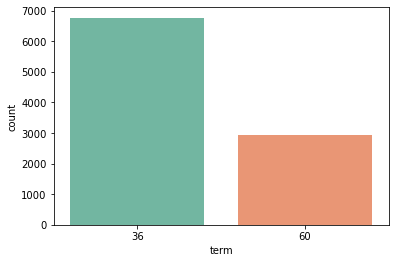

In [70]:
sns.countplot(data=data, x='term', palette='Set2')

In [71]:
term_dummies = pd.get_dummies(data['term'], drop_first=True)
data = pd.concat([data.drop('term', axis=1), term_dummies], axis=1)

In [72]:
data = data.drop('grade', axis=1)

In [73]:
sub_grade_dummies = pd.get_dummies(data['sub_grade'], drop_first=True)
data = pd.concat([data.drop('sub_grade', axis=1), sub_grade_dummies], axis=1)

In [74]:
data.shape

(9692, 137)

In [75]:
loan_status_dummies = pd.get_dummies(data['loan_status'], drop_first=True)
data = pd.concat([data.drop('loan_status', axis=1), loan_status_dummies], axis=1)

initial_listing_status_dummies = pd.get_dummies(data['initial_listing_status'], drop_first=True)
data = pd.concat([data.drop('initial_listing_status', axis=1), initial_listing_status_dummies], axis=1)

In [76]:
disbursement_method_dummies = pd.get_dummies(data['disbursement_method'], drop_first=True)
data = pd.concat([data.drop('disbursement_method', axis=1), disbursement_method_dummies], axis=1)

In [77]:
data.shape

(9692, 138)

In [78]:
data['paid_late_fees'].value_counts()

0.00     9660
15.00      10
23.31       3
30.33       1
36.60       1
16.23       1
22.58       1
15.52       1
21.10       1
36.67       1
16.76       1
42.91       1
45.12       1
32.70       1
16.63       1
19.92       1
25.64       1
26.49       1
32.82       1
30.75       1
20.17       1
30.00       1
Name: paid_late_fees, dtype: int64

In [79]:
data = data.drop('paid_late_fees', axis=1)

In [80]:
data['interest_rate'].value_counts()

9.93     379
9.44     358
11.99    358
10.42    342
13.59    334
12.62    323
7.35     315
14.08    308
6.72     299
10.91    297
15.05    295
9.43     279
6.08     275
16.02    274
10.90    270
7.97     265
12.61    259
11.98    249
9.92     244
7.34     239
5.32     227
13.58    217
7.96     202
6.07     198
15.04    196
16.01    191
10.41    189
19.03    187
6.71     184
17.09    184
5.31     182
14.07    181
18.06    168
21.45    160
18.45    143
20.00    132
17.47    120
19.42    112
20.39     90
21.85     84
26.30     49
25.82     45
24.85     39
23.88     36
26.77     33
24.84     31
28.72     28
22.91     28
25.81     25
23.87     20
22.90     12
30.79     11
29.69      8
30.17      8
30.65      5
6.00       3
30.75      2
Name: interest_rate, dtype: int64

/Users/hrishitelang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


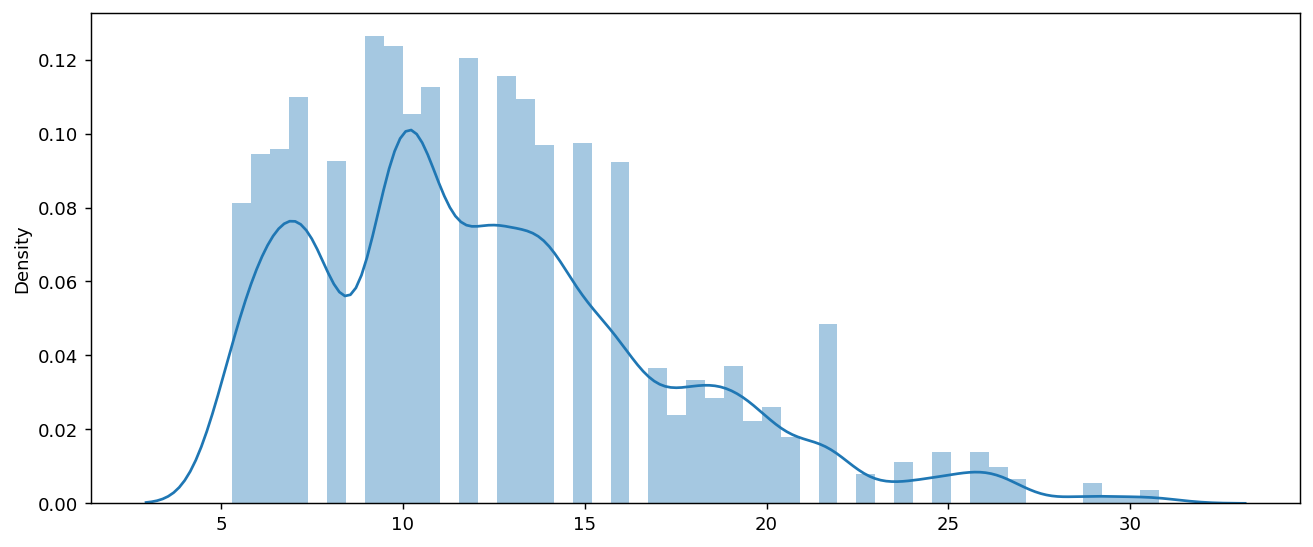

In [81]:
plt.figure(figsize=(12,5), dpi=130)
sns.distplot(x=data['interest_rate']);

In [82]:
data = data.drop('issue_month', axis=1)

In [83]:
data['months_since_last_credit_inquiry'].value_counts()

1.0     755
2.0     710
0.0     657
3.0     641
4.0     630
5.0     562
6.0     536
7.0     490
8.0     462
9.0     377
10.0    364
11.0    270
13.0    261
12.0    244
14.0    221
15.0    210
16.0    180
18.0    168
17.0    164
19.0    128
20.0    103
21.0    102
22.0    100
23.0     74
24.0     32
Name: months_since_last_credit_inquiry, dtype: int64

We have to perform SimpleImputer to this column as there are NAN values.

In [84]:
data['num_accounts_120d_past_due'].value_counts()

0.0    9396
Name: num_accounts_120d_past_due, dtype: int64

This column has to be dropped as there are only NA values.

In [85]:
data['debt_to_income'].value_counts()

0.00     26
16.11    14
20.66    12
19.42    12
13.20    12
         ..
29.57     1
34.60     1
50.30     1
33.10     1
45.26     1
Name: debt_to_income, Length: 3641, dtype: int64

This column again is very skewed in nature and will not help us get any valuable insights.

In [86]:
data = data.drop('debt_to_income', axis=1)

In [87]:
data = data.drop('num_accounts_120d_past_due', axis=1)

In [88]:
#I performed mean to standardise the variables
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data['emp_length'] = imputer.fit_transform(data['emp_length'].values.reshape(-1,1))

In [89]:
data['months_since_last_credit_inquiry'] = imputer.fit_transform(data['months_since_last_credit_inquiry'].values.reshape(-1,1))

In [90]:
data['emp_length'].value_counts()

10.000000    3213
2.000000      929
3.000000      839
5.922713      803
0.000000      668
1.000000      665
5.000000      631
4.000000      596
6.000000      396
7.000000      356
9.000000      302
8.000000      294
Name: emp_length, dtype: int64

In [91]:
data['months_since_last_credit_inquiry'].value_counts()

7.38467     1251
1.00000      755
2.00000      710
0.00000      657
3.00000      641
4.00000      630
5.00000      562
6.00000      536
7.00000      490
8.00000      462
9.00000      377
10.00000     364
11.00000     270
13.00000     261
12.00000     244
14.00000     221
15.00000     210
16.00000     180
18.00000     168
17.00000     164
19.00000     128
20.00000     103
21.00000     102
22.00000     100
23.00000      74
24.00000      32
Name: months_since_last_credit_inquiry, dtype: int64

In [92]:
data.shape 

(9692, 134)

# Train test split and Scaling:

In [93]:
X = data.drop('interest_rate', axis=1)

In [94]:
y = data['interest_rate']

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [96]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [97]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Classifier 1: Random Forest Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [99]:
pred = regressor.predict(X_test)

In [100]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, pred, squared=False)

1.020045178797

In [101]:
r2_score(y_test,pred)

0.9556134393615512

In [102]:
r2 = r2_score(y_test, pred)
n = len(y_test)
X_test = pd.DataFrame(X_test)
k = len(X_test.columns)

adj_r2_score = 1 - (((1-r2)*(n-1))/(n-k-1))
adj_r2_score

0.9523428506829287

# Classifier 2: SVM Regressor

In [103]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [104]:
pred = regressor.predict(X_test)

In [105]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, pred, squared=False)

1.951797861068217

In [106]:
r2_score(y_test,pred)

0.8374891526467827

In [107]:
r2 = r2_score(y_test, pred)
n = len(y_test)
X_test = pd.DataFrame(X_test)
k = len(X_test.columns)

adj_r2_score = 1 - (((1-r2)*(n-1))/(n-k-1))
adj_r2_score

0.8255146691575983

# Classifier 3: Lasso Regressor

In [108]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

Lasso(alpha=1)

In [109]:
pred = reg.predict(X_test)

In [110]:
mean_squared_error(y_test, pred, squared=False)

4.8451858658804925

In [111]:
r2_score(y_test,pred)

-0.0014598964547332116

In [112]:
r2 = r2_score(y_test, pred)
n = len(y_test)
X_test = pd.DataFrame(X_test)
k = len(X_test.columns)

adj_r2_score = 1 - (((1-r2)*(n-1))/(n-k-1))
adj_r2_score

-0.07525167829876622

# Classifier 4: Decision Tree Regressor

In [119]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [120]:
pred = regressor.predict(X_test)

In [121]:
mean_squared_error(y_test, pred, squared=False)

1.6723254339048343

In [122]:
r2_score(y_test,pred)

0.8806962021270454

In [123]:
r2 = r2_score(y_test, pred)
n = len(y_test)
X_test = pd.DataFrame(X_test)
k = len(X_test.columns)

adj_r2_score = 1 - (((1-r2)*(n-1))/(n-k-1))
adj_r2_score

0.8719053959679856

## Conclusion:

As a data scientist who works in a loan provider company, I wanted to calculate the prediction of interest rate based on different customer information provided. For this, we performed EDA, analyzed the sense of the data and saw the anomalies present in this. I used SimpleImputer to remove the values that had a proportion of NA in them, I also used dummy variables for categorical variables, dropped most NA columns that served no purpose, and also standardized most quantitative variables. Later, I performed regression analysis using Random Forests, SVM, Lasso and Decision Tree and here are the following Adjusted R-Scores:

Random Forest: 0.9523
SVM: 0.8255
Lasso: -0.07525
Decision Tree: 0.8719

Random Forest and Decision Tree are better regressors as they are providing a 'good fit' to the model based on the score.

## What could I have done if I had more time:

I wanted to get more into the depths of the quantitative data. I wanted to perform Neural Network Regressor to accurately identify the best hyperparameters by performing hyperparameter tuning. I wanted to check more quantitative values and in what way I could have performed some standardization that could help me get better r score accuracy and a better fitted model. Even with a higher score, there could also potentially be issues with the bias in the dataset. If I had more time, I could have potentially performed some additional steps to maintain a good balance between variance and bias to build a perfect model. I also wanted to write more comments to explain what I did, but typically with ML predictions, I wanted to adjust and take more time with tuning the models!